<a href="https://colab.research.google.com/github/GabrielaRomoM/CDS-2025-1/blob/main/Simulaciones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerias

In [ ]:
!pip install numpy scipy matplotlib
import numpy as np
import scipy.signal as signal
import matplotlib.pyplot as plt
from scipy import signal
from scipy.integrate import solve_ivp
from scipy.signal import place_poles

# 7.13

Simulación de las respuesta del lazo cerrado con referencia en  θ2 y perturbación de torque.


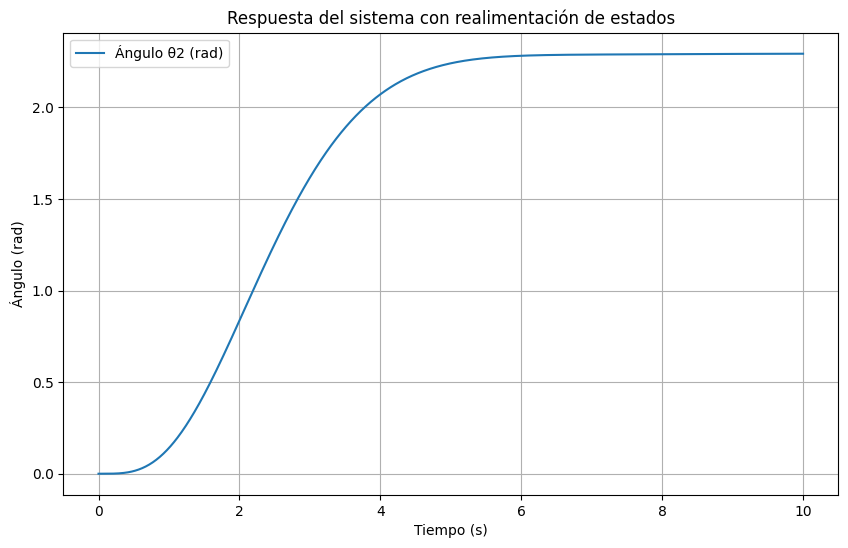

In [ ]:
# Parámetros normalizados
tau = 0.4  # Coeficiente de amortiguamiento
J1 = 10  # Momento de inercia 1
J2 = 10  # Momento de inercia 2
k = 12.6  # Valor de k original

# Matrices del sistema en espacio de estados
A = np.array([[0, 1, 0, 0],
              [-k/J1, -tau/J1, k/J1, 0],
              [0, 0, 0, 1],
              [k/J2, 0, -k/J2, -tau/J2]])
B = np.array([[0], [1/J1], [0], [0]])  # Control actuando sobre el primer rotor
C = np.array([[1, 0, 0, 0], [0, 0, 1, 0]])
D = np.array([[0], [0]])

# Ubicación deseada de los polos del sistema controlado
desired_poles = np.array([-2, -1, -1 + 1j, -1 - 1j])

# Cálculo de la matriz de ganancias K
K = place_poles(A, B, desired_poles).gain_matrix

# Definimos el sistema de ecuaciones diferenciales con control por realimentación
def motor_system_closed_loop(t, y, K, r):
    theta1, omega1, theta2, omega2 = y
    x = np.array([[theta1], [omega1], [theta2], [omega2]])
    u = -K @ (x - r)  # Control por realimentación de estados
    dxdt = A @ x + B @ u
    return dxdt.flatten()

# Condiciones iniciales
y0 = [0, 0, 0, 0]  # Estado inicial en reposo

# Simulación con referencia r y perturbación de torque
time_span = (0, 10)  # Simulamos de 0 a 10 segundos
t_eval = np.linspace(0, 10, 1000)
r = np.array([[1], [0], [0], [0]])  # Cambio de referencia en θ1

# Simulación
sol = solve_ivp(motor_system_closed_loop, time_span, y0, args=(K, r), t_eval=t_eval)

# Graficamos la respuesta del sistema controlado
plt.figure(figsize=(10, 6))
plt.plot(sol.t, sol.y[2], label='Ángulo θ2 (rad)')
plt.xlabel('Tiempo (s)')
plt.ylabel('Ángulo (rad)')
plt.title('Respuesta del sistema con realimentación de estados')
plt.legend()
plt.grid()
plt.show()

# 7.14

Respuesta del sistema respuesta a un cambio en la referencia de dirección de
0.002 rad utilizando tu matriz de ganancia K=[−0.664,8.31,10.8,0.11].

Parte del código obtenida de la página web del libro (archivo matlab).

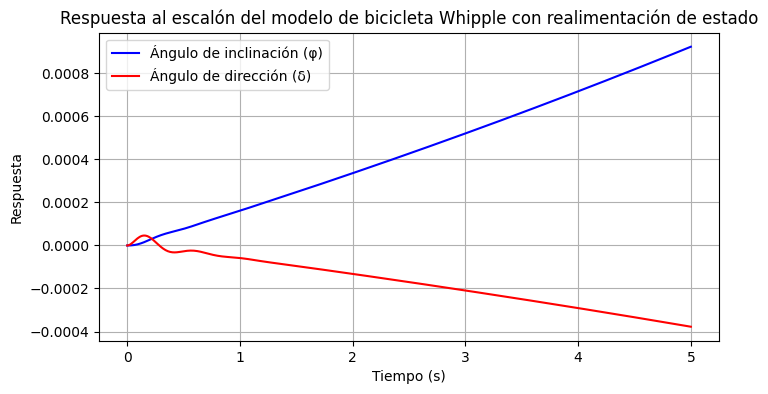

In [ ]:
# Parámetros físicos del modelo Whipple
g = 9.81
b = 1.00
c = 0.08
Rrw = 0.35
Rfw = 0.35
lambda_angle = np.pi * 70 / 180
mrf, xrf, zrf = 87, 0.491586, 1.028138
Jxxrf, Jxzrf, Jyyrf, Jzzrf = 3.283666, 0.602765, 3.8795952, 0.565929
mff, xff, zff = 2, 0.866, 0.676
Jxxff, Jxzff, Jyyff, Jzzff = 0.08, -0.02, 0.07, 0.02
mrw, Jxxrw, Jyyrw = 1.5, 0.07, 0.14
mfw, Jxxfw, Jyyfw = 1.5, 0.07, 0.14
Jzzrw, Jzzfw = Jxxrw, Jxxfw

# Cálculo de propiedades del sistema
mt = mrf + mrw + mff + mfw
xt = (mrf*xrf + mrw*0 + mff*xff + mfw*b) / mt
zt = (mrf*zrf + mrw*Rrw + mff*zff + mfw*Rfw) / mt
Jxxt = Jxxrf + mrf*zrf**2 + Jxxrw + mrw*Rrw**2 + Jxxff + mff*zff**2 + Jxxfw + mfw*Rfw**2
Jxzt = Jxzrf + mrf*xrf*zrf + Jxzff + mff*xff*zff + mfw*b*Rfw
Jzzt = Jzzrf + mrf*xrf**2 + Jzzrw + mrw*0**2 + Jzzff + mff*xff**2 + Jzzfw + mfw*b**2
mf = mff + mfw
xf = (mff*xff + mfw*b) / mf
zf = (mff*zff + mfw*Rfw) / mf
Jxxf = Jxxff + mff*(zff-zf)**2 + Jxxfw + mfw*(Rfw-zf)**2
Jxzf = Jxzff + mff*(xff-xf)*(zff-zf) + mfw*(b-xf)*(Rfw-zf)
Jzzf = Jzzff + mff*(xff-xf)**2 + Jzzfw + mfw*(b-xf)**2
d = (xf-b-c)*np.sin(lambda_angle) + zf*np.cos(lambda_angle)
Fll = mf*d**2 + Jxxf*np.cos(lambda_angle)**2 + 2*Jxzf*np.sin(lambda_angle)*np.cos(lambda_angle) + Jzzf*np.sin(lambda_angle)**2
Flx = mf*d*zf + Jxxf*np.cos(lambda_angle) + Jxzf*np.sin(lambda_angle)
Flz = mf*d*xf + Jxzf*np.cos(lambda_angle) + Jzzf*np.sin(lambda_angle)
gamma = c*np.sin(lambda_angle) / b
Sr, Sf, St = Jyyrw/Rrw, Jyyfw/Rfw, Jyyrw/Rrw + Jyyfw/Rfw
Su = mf*d + gamma*mt*xt

# Matrices del modelo Whipple
M = np.array([[Jxxt, -Flx - gamma*Jxzt], [-Flx - gamma*Jxzt, Fll + 2*gamma*Flz + gamma**2*Jzzt]])
K0 = np.array([[-mt*g*zt, g*Su], [g*Su, -g*Su*np.cos(lambda_angle)]])
K2 = np.array([[0, -(St+mt*zt)*np.sin(lambda_angle)/b], [0, (Su+Sf*np.cos(lambda_angle))*np.sin(lambda_angle)/b]])
C0 = np.array([[0, -gamma*St - Sf*np.sin(lambda_angle) - Jxzt*np.sin(lambda_angle)/b - gamma*mt*zt],
               [gamma*St + Sf*np.sin(lambda_angle), Flz*np.sin(lambda_angle)/b + gamma*(Su + Jzzt*np.sin(lambda_angle)/b)]])

# Velocidad del modelo
v0 = 5

# Construcción del sistema en espacio de estados
A = np.block([
    [np.zeros((2, 2)), np.eye(2)],
    [-np.linalg.inv(M) @ (K0 + K2 * v0**2), -np.linalg.inv(M) @ (C0 * v0)]
])
B = np.vstack((np.zeros((2,1)), np.linalg.inv(M) @ np.array([[0], [1]])))
C = np.eye(4)
D = np.zeros((4, 1))

# Controlador de realimentación de estado
K = np.array([-0.664, 8.31, 10.8, 0.11]).reshape((1, 4))  # Asegurar que K sea un vector fila
A_cl = A - B @ K  # Ahora la multiplicación de dimensiones es correcta

# Crear sistema en lazo cerrado
sys_cl = signal.StateSpace(A_cl, B, C, D)

# Simulación de la respuesta a un escalón de 0.002 rad
t = np.linspace(0, 5, 500)  # Tiempo de simulación de 0 a 5 segundos
u = 0.002 * np.ones_like(t)  # Entrada escalón

# Simulación del sistema
t, y, x = signal.lsim(sys_cl, U=u, T=t)

# Graficar la respuesta
plt.figure(figsize=(8, 4))
plt.plot(t, y[:, 0], 'b', label='Ángulo de inclinación (φ)', linewidth=1.5)
plt.plot(t, y[:, 1], 'r', label='Ángulo de dirección (δ)', linewidth=1.5)
plt.xlabel('Tiempo (s)')
plt.ylabel('Respuesta')
plt.title('Respuesta al escalón del modelo de bicicleta Whipple con realimentación de estado')
plt.legend()
plt.grid()
plt.show()

# 7.16

c. Simular el sistema y explorar el efecto de a en el tiempo de subida y el sobre impulso.

/usr/local/lib/python3.11/dist-packages/scipy/signal/_ltisys.py:600: BadCoefficients: Badly conditioned filter coefficients (numerator): the results may be meaningless
  self.num, self.den = normalize(*system)


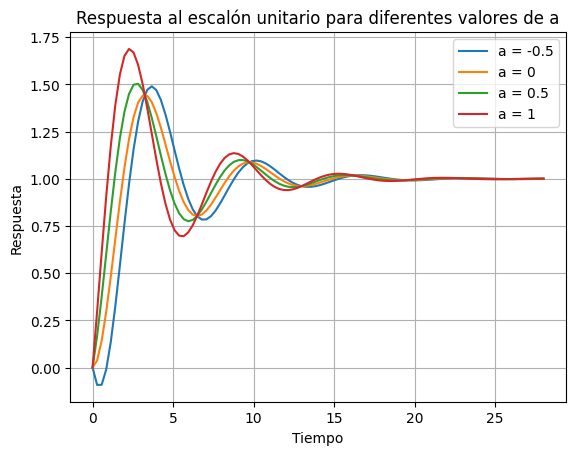

In [ ]:
# Definir la función de transferencia
def system_response(a):
    num = [a, 1]
    den = [1, 0.5, 1]
    system = signal.TransferFunction(num, den)
    t, y = signal.step(system)
    return t, y

# Valores de a para explorar
a_values = [-0.5, 0, 0.5, 1]

# Graficar las respuestas
plt.figure()
for a in a_values:
    t, y = system_response(a)
    plt.plot(t, y, label=f'a = {a}')
plt.xlabel('Tiempo')
plt.ylabel('Respuesta')
plt.title('Respuesta al escalón unitario para diferentes valores de a')
plt.legend()
plt.grid()
plt.show()